# Introduction to the BART command-line tools

This tutorial introduces the BART command-line inteface (CLI). The CLI tools operate on multidimensional arrays stored in files, and can be stringed together to create complete simulation and reconstruction programs.


## Getting Started

### Requirements

- Install bart (version 0.4.04 or newer): https://github.com/mrirecon/bart  
- Set the `TOOLBOX_PATH` to the BART directory and add it to the `PATH`
- If running interactively, add the `view` program to `PATH` for plotting
```bash
export TOOLBOX_PATH=/path/to/bart  
export PATH=$TOOLBOX_PATH:$PATH
export PATH=/path/to/view:$PATH
```

Although the simplest way to call the BART CLI tools is through a terminal, there are also wrapper functions that allow the tools to run through Matlab and Python. These are located under the `$TOOLBOX_PATH/matlab` and `$TOOLBOX_PATH/python` directories.



### Running through MyBinder
MyBinder allows us to run a Jupyter Lab instance through a browser. BART will be installed and configured automatically.

### DEBUG statements
It is possible to control the level of Debug info that BART commands produce through the `DEBUG_LEVEL` environment variable. By setting this to a number greater than zero, different amounts of output will be seen. A good choice is to set it to 5, which is a balance between too much info and too little.

In [1]:
export DEBUG_LEVEL=5

BART provides a number of tools for MRI image reconstruction and multi-dimensional array manipulation.

In [2]:
# get a list of BART commands by running bart with no arguments:
bart

BART. Available commands are:
avg         bench       bitmask     cabs        caldir      calmat      
carg        casorati    cc          ccapply     cdf97       circshift   
conj        conv        copy        cpyphs      creal       crop        
delta       ecalib      ecaltwo     estdelay    estdims     estshift    
estvar      extract     fakeksp     fft         fftmod      fftshift    
filter      flatten     flip        fmac        homodyne    index       
invert      itsense     join        lrmatrix    mandelbrot  mip         
nlinv       noise       normalize   nrmse       nufft       ones        
pattern     phantom     pics        pocsense    poisson     poly        
repmat      reshape     resize      rof         rss         sake        
saxpy       scale       sdot        show        slice       spow        
sqpics      squeeze     std         svd         threshold   toimg       
traj        transpose   twixread    var         vec         version     
walsh       wave     

: 1

### BART Command Structure

<span style="font-size:1.2em;"> **`bart`** + **`command`** + **`options`** + **`input / output`** </span>

Each BART command comtains a number of optional arguments, followed by input and output files.   
To see all options and requirements of a command, use the `-h` flag:


In [3]:
# Obtain help for each command (-h)
bart toimg -h

Usage: toimg [-g f] [-c f] [-w f] [-d] [-m] [-W] [-h] <input> <output_prefix>

Create magnitude images as png or proto-dicom.
The first two non-singleton dimensions will
be used for the image, and the other dimensions
will be looped over.


-g gamma      	gamma level
-c contrast      	contrast level
-w window      	window level
-d		write to dicom format (deprecated, use extension .dcm)
-m		re-scale each image
-W		use dynamic windowing
-h		help


BART loosely follows the Linux CLI convention, where optional arguments are indicated with brackets, and files are indicated by carrot symbols.

As we can see, there are many CLI tools available. The full descriptions of each program can be found under `$TOOLBOX_PATH/doc/commands.txt`.

### Displaying images

Before getting started, let's make a helper function for displaying images. We will use the BART command `toimg`, which can convert BART files to pngs.

If our session supports X-windows forwarding, we can instead use the BART viewer, `view`, to open an interactive viewer.

Other options for viewing BART files are to use the Python and Matlab wrappers, and use any viewer within those programs.

In [7]:
# BASH function to write BART file to png,
# display the png, and then temove it
function imshow () {
    bart toimg -W $1 $1.png > /dev/null
    cat $1.png | display
    rm $1.png
}

 ## Using BART
 
As a first example, let's create a Shepp-Logan numerical phantom in k-space. We will use the `phantom` tool. Before using the tool, let's look at its options

In [5]:
bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-x d] [-G d] [-3] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S Output nc sensitivities
-k		k-space
-t file      	trajectory
-x n      	dimensions in y and z
-G n=1,2      	Geometric object phantom
-3		3D
-h		help


The `phantom` tool includes the option `-k` to create it directly in k-space, and `-x` to specify the dimensions.

Shepp-Logan k-space phantom


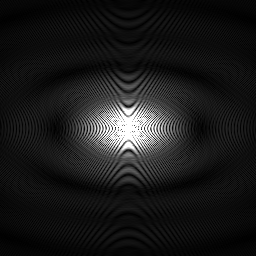

In [112]:
# Create Cartesian k-space phantom (256 samples)
bart phantom -x 256 -k shepp_logan

echo "Shepp-Logan k-space phantom"
imshow shepp_logan
# view  shepp_logan

### Data files

All data files are multi-dimensional arrays. By running the `phantom` command, we made new files on disk, with the names  
`shepp_logan.cfl` and `shepp_logan.hdr`

The data files represent a multi-dimensional array. The `hdr`, or header file, contains the data dimensions and other information about the dataset. The `cfl`, or complex-float file, contains the single-precision raw data in column-major order and interleaved real and imaginary parts.  

The header file is a raw text file and can be opened with any text editor. The complex-float file is a binary file. Matlab and Python readers/writers are available under the `matlab` and `python` directories, respectively.

### View Data Dimensions

Because the header file is a text file, we can directly print it:

In [7]:
cat shepp_logan.hdr

# Dimensions
256 256 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
# Command
phantom -x 256 -k shepp_logan 
# Files
 >shepp_logan
# Creator
BART v0.4.04-dirty


Although not discussed here, BART can write to other file formats, including a simple H5 container, ISMRMRD format, and others. Therefore, not every format will include a header file. Thus, it is better to use the `show` command.

In [8]:
bart show -h

Usage: show [-m] [-d d] [-s <string>] [-f <string>] <input>

Outputs values or meta data.

-m		show meta data
-d dim      	show size of dimension
-s sep      	use <sep> as the separator
-f format      	use <format> as the format. Default: "%+e%+ei"
-h		help


We can look at an individual dimension of the data with the `-d` command, or we can display all the meta data about the dataset. 

Next, we show the dimensions of the created Shepp-Logan phantom

In [9]:
bart show -m shepp_logan

Type: complex float
Dimensions: 16
AoD:	256	256	1	1	1	1	1	1	1	1	1	1	1	1	1	1


Our dataset is 16-dimensional, but only the first two dimensions are non-singleton.

By convention, the dimensions are `[X, Y, Z, C, M, T, F, ...]`,
where `(X, Y, Z)` are the spatial matrix dimensions,  
`C` and `M` are the coil dimensions and ESPIRiT maps dimensions, respectively,  
`T` and `F` are used for echo times and coefficient dimensions,   
and other higher order dimensions such as phase, flow encode, etc.

### Bitmasks
Let's reconstruct our k-space phantom. using a simple inverse Fourier transform.  
Therefore, we perform a Fast Fourier Transform (FFT).

BART has an `fft` tool for doing just that.

IFFT of Shepp-Logan phantom


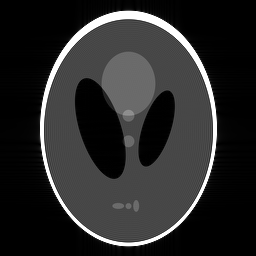

In [10]:
# Perform FFT reconstruction
bart fft -u -i 3 shepp_logan shepp_logan_rec

echo "IFFT of Shepp-Logan phantom"
imshow shepp_logan_rec
# view shepp_logan_rec

Let's see the fft-options.

In [11]:
# Show help for fft command
bart fft -h

Usage: fft [-u] [-i] [-n] bitmask <input> <output>

Performs a fast Fourier transform (FFT) along selected dimensions.

-u		unitary
-i		inverse
-n		un-centered
-h		help


Thus, we performed an inverse (`-i`) unitary (`-u`) Fast Fourier Transform on the image dimensions **`(0, 1)`** specified by the bitmask **`3`**.


Instead of using for loops, BART data operates on bitmasks. To operate on a particular array dimension, a bitmask specifies the active dimensions. This is a powerful approach for perfoming multi-dimensional operations, as all the tools will work on arbitrarily chosen dimensions.   

In our case, we wanted to perform an IFFT along dimensions 0 and 1, and the bitmask is calculated as:  
<center>
$ \text{bitmask}=2^{~0} + 2^{~1} = 3$
</center> <br>
BART also provides a command-line tool to calculate the bitmasks for specific dimensions.

In [12]:
# Calculate bitmask for active dimensions 0 and 1
bart bitmask 0 1

3


## BART Examples

### Low-Pass Filtering

Here, we create and apply a simple mask to low-pass filter the k-space phantom. We use the `ones` tool to make an array of all-ones, and then zero-pad it to the full k-space matrix size

low-pass filter mask


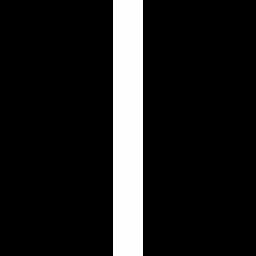

In [13]:
# Create a mask consisting of ones with two dimensions: (256, 30)
bart ones 2 256 30 mask_center

# Zero-pad the second (index 1) dimension to the full k-space dimension 
bart resize -c 1 256 mask_center mask_full

echo "low-pass filter mask"
# view mask_full
imshow mask_full

Now let's multiply our data with the mask. To perform the multiplication, we use the `fmac` tool, which stands for **Fused Multiply-Accumulate**. The `fmac` tool is a very powerful way of multiplying two multi-dimensional arrays, and then summing along specific dimension. In this way, we can perform simple multiplication, through vector and matrix multiplications, all the way to tensor products.

Low-pass filtered k-space


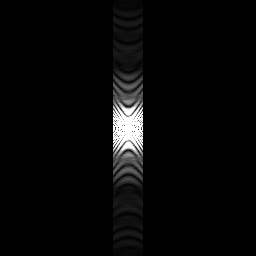

In [14]:
# Multiply mask with k-space
bart fmac shepp_logan mask_full shepp_logan_lp

echo "Low-pass filtered k-space"
imshow shepp_logan_lp
# view shepp_logan_lp

We repeat the unitary inverse FFT on our dataset:

Low-pass filtered reconstruction


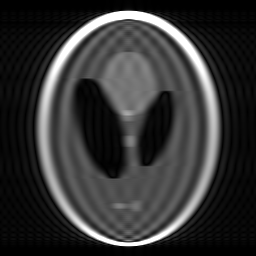

In [15]:
# Reconstruction of low-pass filtered k-space data
bart fft -u -i 3 shepp_logan_lp shepp_logan_lp_reco

echo 'Low-pass filtered reconstruction'
imshow shepp_logan_lp_reco
# view shepp_logan_lp_reco

### Undersampling Artifacts

Now let's consider downsampling k-space by a factor of `R` which is common in parallel imaging. To do this with BART, we will string together multiple commands

Sampling pattern


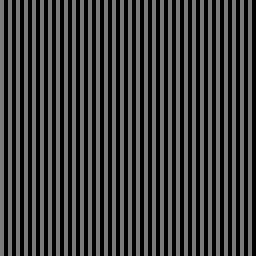

Under-sampled k-space data


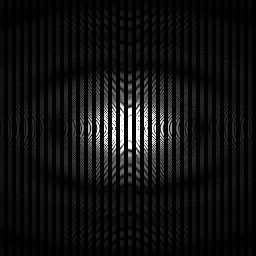

In [113]:
# Create Cartesian undersampling pattern (2x undersampling with 20 auto-calibration lines)

R=4 #Define undersampling factor as powers of 2

# Create local pattern, assuming homogeneous undersampling in one dimension
bart ones 2 256 1 ones
bart zeros 2 256 1 zeros

bart join 1 $(seq 1 $R | xargs  -I{} echo ones) $(seq 1 $R | xargs -I{}  echo zeros) pattern

# Repeat local pattern to get undersampling pattern
bart repmat 2 $((128/R)) pattern tmp
bart reshape $(bart bitmask 1 2) 256 1 tmp grid

echo "Sampling pattern"
imshow grid


# Multiply undersampling pattern with image
bart fmac shepp_logan grid shepp_us

echo "Under-sampled k-space data"
imshow shepp_us

When we reconstruct the data with an IFFT, what do we expect to see?

Under-sampled reconstruction


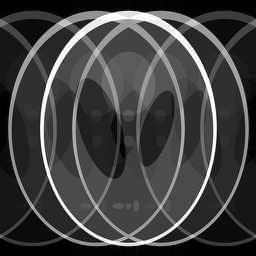

In [17]:
# Reconstruction of undersampled k-space data
bart fft -u -i 3 shepp_us shepp_us_reco

echo "Under-sampled reconstruction"
imshow shepp_us_reco

### Scripting New Tools: Undersampling

BART offers numerous sampling and reconstruction tools out of the box, however, users are encouraged to combine existing tools to create scripts that meet their own needs. In the following example, we will create an undersampling tool that allows us to generalize the above process for arbitrary images of two dimensions.

In [125]:
function undersample() {
    # The following function skips every R columns and every M rows.
    # Usage: undersample <R> <M> <input> <output>
    
    
    R=$1 #Undersampling factor along column
    M=$2 #Undersampling factor along rows
    
    # Create a row and column sampling pattern
    bart ones 2 256 1 ones_col
    bart zeros 2 256 1 zeros_col
    
    bart ones 2 1 256 ones_row
    bart zeros 2 1 256 zeros_row
    
    bart join 1 $(seq 1 $R | xargs -I{} echo ones_col) $(seq 1 $R | xargs -I{} echo zeros_col) pattern
    bart join 0 $(seq 1 $M | xargs -I{} echo ones_row) $(seq 1 $M | xargs -I{} echo zeros_row) pattern_t
    
    # repeat pattern to create filters of size 256
    bart repmat 2 $((128/R)) pattern tmp
    bart repmat 2 $((128/M)) pattern_t tmp_t
    
    bart reshape $(bart bitmask 1 2) 256 1 tmp grid
    bart reshape $(bart bitmask 0 1 2) 256 256 1 tmp_t grid_t

    # Combine row and column filters
    bart fmac grid grid_t filter
    
    # Apply the filter to the image
    bart fmac filter $3 $4
}

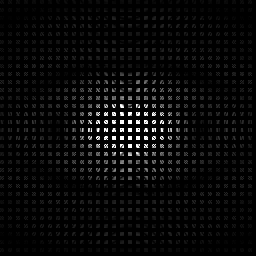

In [127]:
undersample 4 4 shepp_logan undersample_test
imshow undersample_test

We have successfully created a parameterizable undersampler for two-dimensional data, using primitive commands in BART. Let's run an FFT on the k-space data to view the reconstruction.

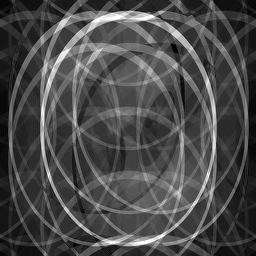

In [130]:
bart fft -u -i 3 undersample_test undersample_recon
imshow undersample_recon

### Reconstruction of Multi-Coil Data
Now, let's create and reconstruct multi-coil data. We will again use the `phantom` command, but this time we will pass the `-s` flag to indicate that we want multiple channels.

We will also add complex-valued Gaussian noise with the `noise` tool, and coil-compress the channels using a software coil compression method with the `cc` tool.

In [2]:
# Create a k-space phantom with multiple (8) coils
bart phantom -x 256 -s 8 -k shepp_coils

In [3]:
# Add Gaussian white noise to the k-space, multi-coil phantom
bart noise -n 2 shepp_coils shepp_noise

In [4]:
# Compress to 4 coils
bart cc -p 4 shepp_noise shepp_cc

Done.


In [5]:
# Reconstruct noisy phantom
bart fft -u -i $(bart bitmask 0 1) shepp_cc shepp

Coil image 0


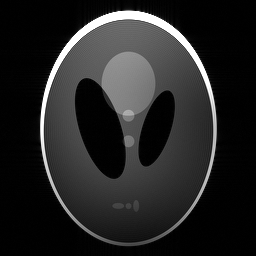

In [8]:
# Slice out one coil-image of the reconstructed k-space phantom and display.
bart slice 3 0 shepp shepp_coil0
echo "Coil image 0"
imshow shepp_coil0

Coil images


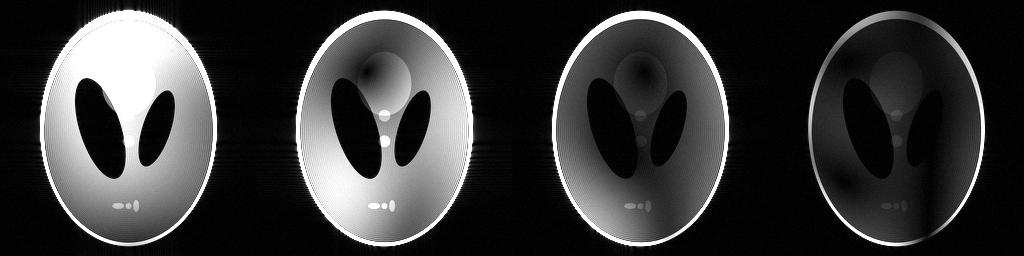

In [9]:
# Reshape the coil images for displaying. We will concatenate the row dimension with the coil dimension  
bart reshape $(bart bitmask 1 3) 1024 1 shepp shepp_flat
echo "Coil images"
imshow shepp_flat

RSS result


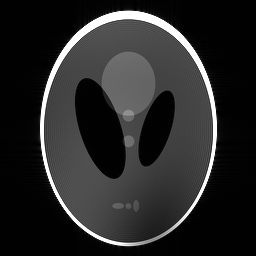

In [10]:
# Combine coils (Root-Sum-of-Squares)
bart rss $(bart bitmask 3) shepp shepp_rss

echo "RSS result"
imshow shepp_rss
# view shepp_rss shepp_coil0

## Parallel Imaging Compressed Sensing (PICS)

One of the most useful functions of BART is the ability to perform parallel imaging calibration and compressed sensing (PICS) reconstructions, including estimating sensitivity maps with ESPIRiT.

BART allows to perform a Parallel Imaging Compressed Sensing reconstruction using the **`bart pics`** command. You can specify a variety of different regularization terms and solvers by simply specifying the respective flags.
Here, we demonstrate how to perform a PICS reconstruction on synthetic data.  

We will reuse the coil-compressed k-space data from the previous section

multi-channel k-space phantom


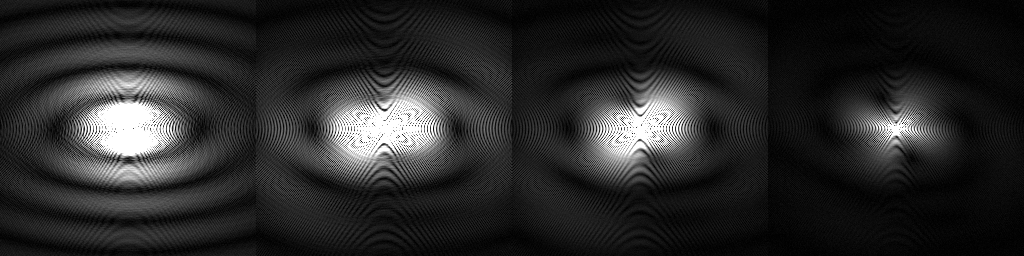

In [11]:
# Display k-space phantom
bart reshape $(bart bitmask 1 3) 1024 1 shepp_cc shepp_flat
echo "multi-channel k-space phantom"
imshow shepp_flat

### Undersampling

Since we want to demonstrate Compressed Sensing, we choose a Poisson-Disc undersampling pattern with 2x2 in-plane acceleration and an Auto-calibration region of 32x32 samples. 

points: 13591, grid size: 256x256x(pi/4) = 51471 (R = 3.787201)
WARN: Overwriting file: poisson
Poisson-disc sampling pattern


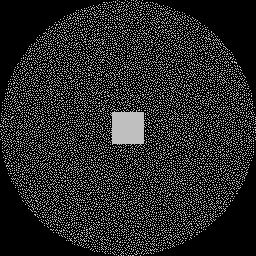

In [12]:
# Create Poisson-Disc undersampling pattern

# 2x2-fold in-plane acceleration. Auto-calibration region: 32x32
bart poisson -Y 256 -y 2 -Z 256 -z 2 -C 32 -e poisson

# Reshape into required dimensions to match the k-space
bart squeeze poisson poisson

# Show pattern
echo "Poisson-disc sampling pattern"
imshow poisson

We simulate an undersampled k-space by applying the pattern to the fully-sampled k-space phantom.

under-sampled k-space


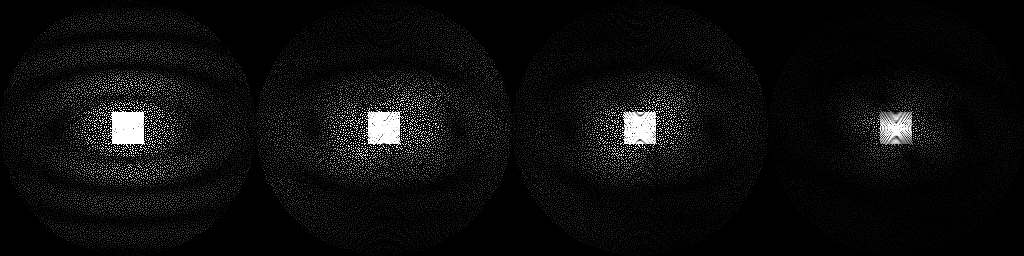

In [27]:
# Multiply pattern and k-space to obtain undersampled k-space
bart fmac shepp_cc poisson shepp_usamp

# Show undersampled k-space phantom
bart reshape $(bart bitmask 1 3) 1024 1 shepp_usamp shepp_usamp_flat
echo "under-sampled k-space"
imshow shepp_usamp_flat

Note that the undersampling pattern was automatically applied to each coil! This is the beauty of the `fmac` tool.  
First, we perform a conventional inverse Fourier Transform and Root-Sum-of-Squares reconstruction.

### Linear Reconstruction

Linear reconstruction


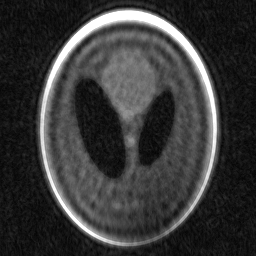

In [26]:
# Conventional FFT-reconstruction

# Perform conventional inverse FFT reconstruction
bart fft -i -u $(bart bitmask 0 1) shepp_usamp shepp_fft

# Combine coils by Root-Sum-of-Squares
bart rss $(bart bitmask 3) shepp_fft shepp_fft_rss

# Show FFT reconstruction
echo "Linear reconstruction"
imshow shepp_fft_rss

The result is - of course - not very pleasing. The image is corrupted by ringing and noise-like artifacts. <br>
So, lets try a more advanced reconstruction technique. We therefore need to determine the coil sensitivities. We therefore use the ESPIRiT approach to obtain one map for each coil.

### Parameterizing the Sampling Pattern

Note that the `poisson` tool has a host of parameters that allow us to modify our sampling pattern.

In the next few cells, we explore some of these options. In particular, we look at the acceleration (parameterized with the `-y` and `-z` flags for their respective dimensions), the size of the calibration region (`-C`), and the effects of variable density (`-v`) and elliptical scanning (`-e`) or lack thereof.

For each modification, we repeat the process of linear reconstruction above. This allows us to compare the results of generating the phantoms with different parameters.

In [27]:
bart poisson -h

Usage: poisson [-Y d] [-Z d] [-y f] [-z f] [-C d] [-v] [-e] [-s d] <outfile>

Computes Poisson-disc sampling pattern.

-Y size      	size dimension 1
-Z size      	size dimension 2
-y acc      	acceleration dim 1
-z acc      	acceleration dim 2
-C size      	size of calibration region
-v		variable density
-e		elliptical scanning
-s seed      	random seed
-h		help


First, we increase the acceleration.

points: 4165, grid size: 256x256x(pi/4) = 51471 (R = 12.358189)
WARN: Overwriting file: poisson_accelerated
Poisson-disc sampling pattern (4x4 Acceleration)


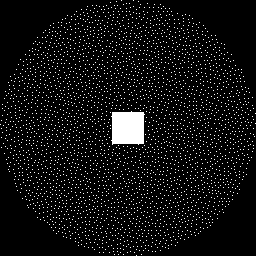

In [29]:
# 4x4-fold in-plane acceleration. Auto-calibration region remains 32x32
bart poisson -Y 256 -y 4 -Z 256 -z 4 -C 32 -e poisson_accelerated

bart squeeze poisson_accelerated poisson_accelerated

echo "Poisson-disc sampling pattern (4x4 Acceleration)"
imshow poisson_accelerated

We observe fewer samples and consequently, larger spacing between them. Additionally, note the increase in intensity of the samples. Now, let's examine the effect that this has on the undersampled k-space:

under-sampled k-space (4x4 Sampling Disc Acceleration)


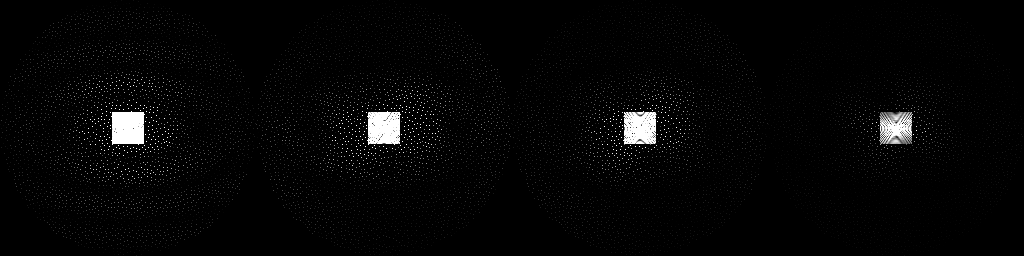

In [31]:
bart fmac shepp_cc poisson_accelerated shepp_usamp_acc

bart reshape $(bart bitmask 1 3) 1024 1 shepp_usamp_acc shepp_acc_flat
echo "under-sampled k-space (4x4 Sampling Disc Acceleration)"
imshow shepp_acc_flat

Comparatively, this sampling appears much more sparse than the above example.

Linear reconstruction


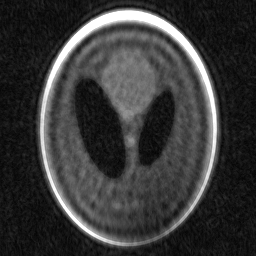

In [32]:
bart fft -i -u $(bart bitmask 0 1) shepp_usamp_acc shepp_fft_acc

bart rss $(bart bitmask 3) shepp_fft_acc shepp_rss_acc

echo "Linear reconstruction"
imshow shepp_fft_rss

The next cell repeats this pipeline for a auto-calibration region of 64x64 samples.

points: 15913, grid size: 256x256x(pi/4) = 51471 (R = 3.234579)
WARN: Overwriting file: poisson_ac
Poisson-disc sampling pattern (64x64 auto-calibration Region)


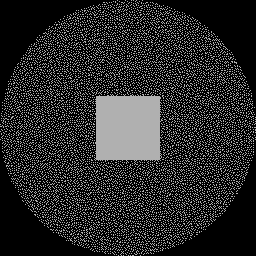

under-sampled k-space (64 x 64 auto-calibration Region)


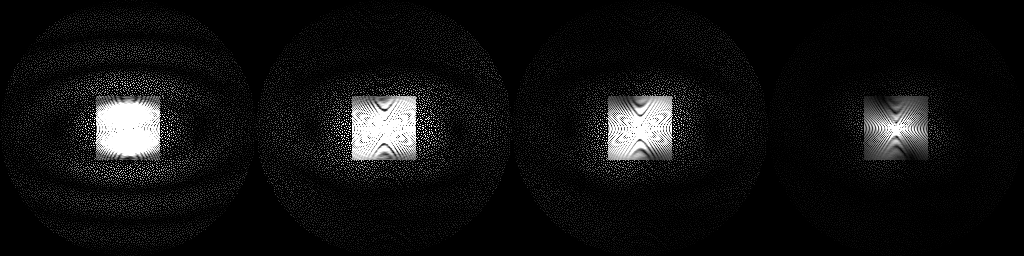

Linear reconstruction


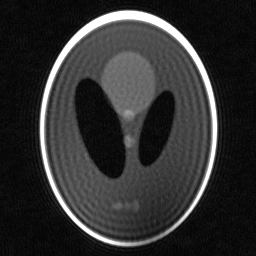

In [35]:
#2x2 Acceleration Poisson Disc with auto-calibration Region of 64x64
bart poisson -Y 256 -y 2 -Z 256 -z 2 -C 64 -e poisson_ac

bart squeeze poisson_ac poisson_ac

echo "Poisson-disc sampling pattern (64x64 auto-calibration Region)"
imshow poisson_ac

bart fmac shepp_cc poisson_ac shepp_usamp_ac

bart reshape $(bart bitmask 1 3) 1024 1 shepp_usamp_ac shepp_ac_flat
echo "under-sampled k-space (64 x 64 auto-calibration Region)"
imshow shepp_ac_flat


bart fft -i -u $(bart bitmask 0 1) shepp_usamp_ac shepp_fft_ac

bart rss $(bart bitmask 3) shepp_fft_ac shepp_fft_rss_ac

echo "Linear reconstruction"
imshow shepp_fft_rss_ac

Of note: the larger auto-calibration region in k-space, and the smoother artifacts in the phantom.

With the `-v` flag, we can enable variable density.

points: 6471, grid size: 256x256x(pi/4) = 51471 (R = 7.954235)
WARN: Overwriting file: poisson_vd
Variable density poisson-disc sampling pattern


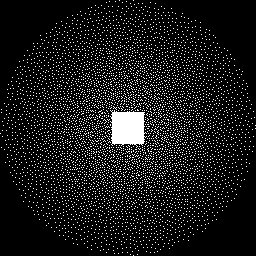

In [37]:
# using -v to toggle variable density
bart poisson -Y 256 -y 2 -Z 256 -z 2 -C 32 -e -v poisson_vd

bart squeeze poisson_vd poisson_vd

echo "Variable density poisson-disc sampling pattern"
imshow poisson_vd

Towards the outside of the disk, the density decreases. Correspondingly, the under-sampled k-space grows increasingly sparse as we move farther from the auto-calibration region.

under-sampled k-space with variable density


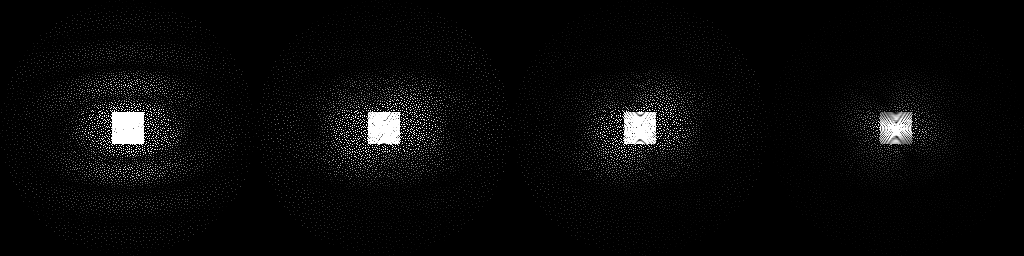

In [38]:
bart fmac shepp_cc poisson_vd shepp_usamp_vd

bart reshape $(bart bitmask 1 3) 1024 1 shepp_usamp_vd shepp_usamp_flat_vd
echo "under-sampled k-space with variable density"
imshow shepp_usamp_flat_vd

Linear reconstruction


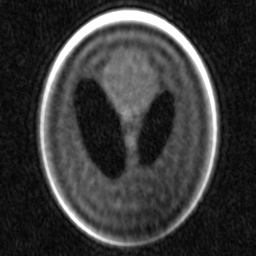

In [40]:
bart fft -i -u $(bart bitmask 0 1) shepp_usamp_vd shepp_fft_vd

bart rss $(bart bitmask 3) shepp_fft_vd shepp_fft_rss_vd

echo "Linear reconstruction"
imshow shepp_fft_rss_vd

Lastly, we disable elliptical scanning.

points: 17097, grid size: 256x256 = 65536 (R = 3.833187)
WARN: Overwriting file: poisson_no_es
Poisson-disc sampling pattern


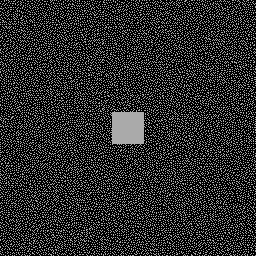

In [41]:
# No elliptical scanning
bart poisson -Y 256 -y 2 -Z 256 -z 2 -C 32 poisson_no_es

bart squeeze poisson_no_es poisson_no_es

echo "Poisson-disc sampling pattern"
imshow poisson_no_es

Immediately apparent is the change in shape of the sampling pattern from the earlier circular pattern.

under-sampled k-space with variable density


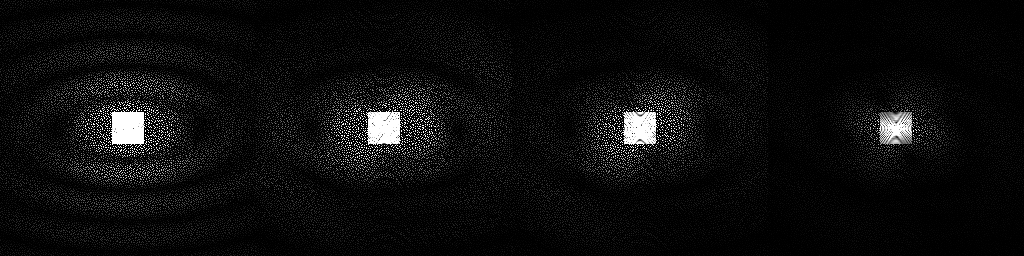

In [43]:
bart fmac shepp_cc poisson_no_es shepp_usamp_no_es

bart reshape $(bart bitmask 1 3) 1024 1 shepp_usamp_no_es shepp_usamp_flat_no_es
echo "under-sampled k-space with variable density"
imshow shepp_usamp_flat_no_es

Linear reconstruction


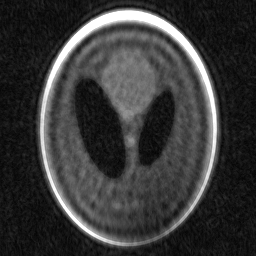

In [44]:
bart fft -i -u $(bart bitmask 0 1) shepp_usamp_no_es shepp_fft_no_es

bart rss $(bart bitmask 3) shepp_fft_no_es shepp_fft_rss_no_es

echo "Linear reconstruction"
imshow shepp_fft_rss_no_es

### Sensitivity Maps

Calibration region...  (size: 24x24x1, pos: 116x116x0)
Energy: 0.595 0.286 0.104 0.015
Build calibration matrix and SVD...
Eigen decomposition... (size: 144)
Using 47/144 kernels (32.64%, last SV: 0.032670).
Zeropad...
FFT (juggling)...
Calculate Gram matrix...
Resize...
Point-wise eigen-decomposition...
Crop maps... (c = 0.80)
Fix phase...
Done.
Estimated sensitivity maps with ESPIRiT


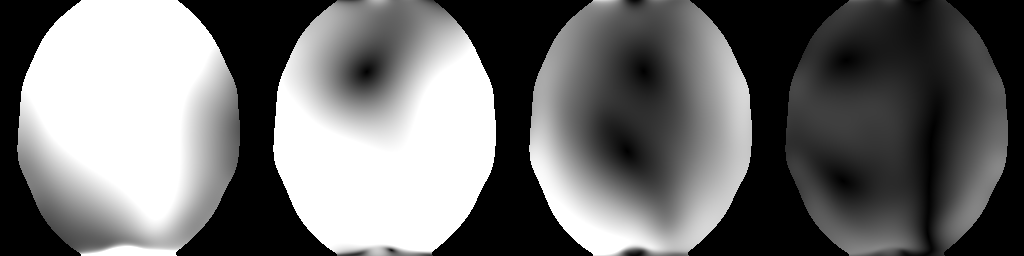

In [132]:
# Iterative Parallel Imaging Reconstruction with different regularization terms

# Compute sensitivity maps using ESPIRiT (constrained to a single map)
# change the DEBUG_LEVEL for this command to reduce the output
DEBUG_LEVEL=4 bart ecalib -m1 shepp_usamp sens

# Show sensitivity maps
bart reshape $(bart bitmask 1 3) 1024 1 sens sens_flat
echo "Estimated sensitivity maps with ESPIRiT"
imshow sens_flat

In [133]:
bart ecalib -h

Usage: ecalib [-t f] [-c f] [-k ...] [-r ...] [-m d] [-S] [-W] [-I] [-1] [-P] [-v f] [-a] [-d d] <kspace> <sensitivites> [<ev-maps>]

Estimate coil sensitivities using ESPIRiT calibration.
Optionally outputs the eigenvalue maps.

-t threshold      	This determined the size of the null-space.
-c crop_value      	Crop the sensitivities if the eigenvalue is smaller than {crop_value}.
-k ksize      	kernel size
-r cal_size      	Limits the size of the calibration region.
-m maps      	Number of maps to compute.
-S		create maps with smooth transitions (Soft-SENSE).
-W		soft-weighting of the singular vectors.
-I		intensity correction
-1		perform only first part of the calibration
-P		Do not rotate the phase with respect to the first principal component
-v variance      	Variance of noise in data.
-a		Automatically pick thresholds.
-d level      	Debug level
-h		help


### Parallel Imaging Reconstruction

Given the sensitivities, the **`bart pics`** command allows an iterative Parallel Imaging reconstruction using different regularization terms. It solves the following minimization problem:

$$\min_x \frac{1}{2} \| F_u S x - y \|_2^2 + R(x) $$
- $F_u$ is the (undersampled) DFT operator
- $S$ is the multi-channel sensitivity operator
- $x$ is the desired image
- $y$ is the acquired kspace data
- $R$ is the desired regularization term

#### Tikhonov (L2) Regularization

A popular regularization is Tikhonov (L2) with
$$R(x) = \frac{\lambda}{2}  \| x \|_2^2  $$

with regularization parameter $\lambda$. 

Size: 65536 Samples: 13644 Acc: 4.80
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Calibration region...  (size: 32x32x1, pos: 112x112x0)
Scaling: 644.484558! (max = 644.484558/p90 = 183.449295/median = 43.066902)
Inverse scaling of the data: 644.484558
l2 regularization: 0.005000
conjugate gradients
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
#0: 52.615627
#1: 4.844840
#2: 1.873068
#3: 1.125854
#4: 0.671931
#5: 0.472993
#6: 0.327247
#7: 0.243088
#8: 0.188450
#9: 0.142078
#10: 0.112799
#11: 0.089352
#12: 0.070982
#13: 0.058000
#14: 0.046580
#15: 0.037910
#16: 0.030471
#17: 0.025459
#18: 0.021277
#19: 0.017463
#20: 0.014611
#21: 0.012130
#22: 0.010200
#23: 0.008461
#24: 0.007037
#25: 0.005974
#26: 0.005075
#27: 0.004330
#28: 0.003622
#29: 0.003116
#30: 0.002716
#31: 0.002308
#32: 0.001956
#33: 0.001664
#34: 0.001410
#35: 0.001204
#36: 0.001031
#37: 

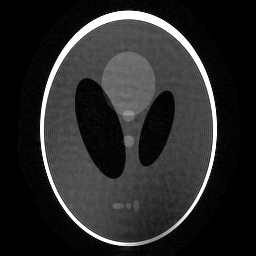

In [30]:
lambda=0.005
iter=50

# Parallel Imaging reconstruction using L2 regularization
DEBUG_LEVEL=5 bart pics -S -l2 -r$lambda -i $iter shepp_usamp sens shepp_l2

# Show L2 and Wavelet reconstructions
echo "L2 Regularization"
imshow shepp_l2


#### L1 Wavelet Regularization

The result is definitely better than the conventional FFT reconstruction, but still undersampling artifacts are visible.<br><br>
We therefore try another regularization term: L1 Wavelets
 $$ R(x) = \lambda \| \Psi x \|_1$$


Size: 65536 Samples: 13644 Acc: 4.80
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Calibration region...  (size: 32x32x1, pos: 112x112x0)
Scaling: 644.484558! (max = 644.484558/p90 = 183.449295/median = 43.066902)
Inverse scaling of the data: 644.484558
l1-wavelet regularization: 0.005000
FISTA
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
Linking args 1-2 of 4.
#It 000: 1.000000   
#It 001: 0.225656   
#It 002: 0.054369   
#It 003: 0.025167   
#It 004: 0.017820   
#It 005: 0.014175   
#It 006: 0.012475   
#It 007: 0.012375   
#It 008: 0.012228   
#It 009: 0.011422   
#It 010: 0.011153   
#It 011: 0.011139   
#It 012: 0.010823   
#It 013: 0.010887   
#It 014: 0.010693   
#It 015: 0.011291   
#It 016: 0.011616   
#It 017: 0.011856   
#It 018: 0.011943   
#It 019: 0.011418   
#It 020: 0.011857   
#It 021: 0.011434   
#It 022: 0.012070   
#It 023: 0.011145   
#It 024: 0.01123

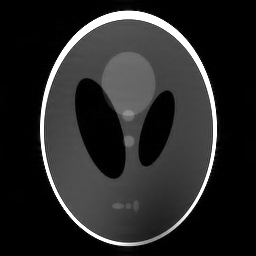

In [31]:
lambda=0.005
iter=50

# Parallel Imaging Compressed Sensing reconstruction using WAVELET regularization
bart pics -S -R W:$(bart bitmask 0 1):0:$lambda -i $iter shepp_usamp sens shepp_wavelet

# Show Wavelet reconstructions
echo "L1 Wavelet Regularization"
imshow shepp_wavelet


A list of available regularization terms can be displayed using the option `-Rh`

In [32]:
bart pics -Rh

Generalized regularization options (experimental)

-R <T>:A:B:C	<T> is regularization type (single letter),
		A is transform flags, B is joint threshold flags,
		and C is regularization value. Specify any number
		of regularization terms.

-R Q:C    	l2-norm in image domain
-R I:B:C  	l1-norm in image domain
-R W:A:B:C	l1-wavelet
-R N:A:B:C	Normalized Iterative Hard Thresholding (NIHT), image domain
		C is an integer percentage, i.e. from 0-100
-R H:A:B:C	NIHT, wavelet domain
-R F:A:B:C	l1-Fourier
-R T:A:B:C	total variation
-R T:7:0:.01	3D isotropic total variation with 0.01 regularization.
-R L:7:7:.02	Locally low rank with spatial decimation and 0.02 regularization.
-R M:7:7:.03	Multi-scale low rank with spatial decimation and 0.03 regularization.


## Conclusion
This concludes the introduction to the BART tools. Additional demos showcase more advanced reconstruction methods, including dynamic imaging with spatio-temporal regularization.